In [1]:
from kuramoto import Kuramoto
from kuramoto.nmf import *
from NNetwork import NNetwork as nn
import seaborn as sns

import networkx as nx

In [2]:
sampling_alg = 'pivot'

ntwk = 'UCLA26' # COVID_PPI, Wisconsin87, Caltech36, UCLA26
ntwk_nonumber = ''.join([i for i in ntwk if not i.isdigit()])
save_folder = 'images/'
k = 50

path = "../Data/Networks_all_NDL/" + str(ntwk) + '.txt'
G = nn.NNetwork()
G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
print('num nodes in G', len(G.nodes()))
print('num edges in G', len(G.get_edges()))

num nodes in G 20467
num edges in G 1495226


num of subgraphs induced on k-paths: 2500
X.shape (2500, 2500)


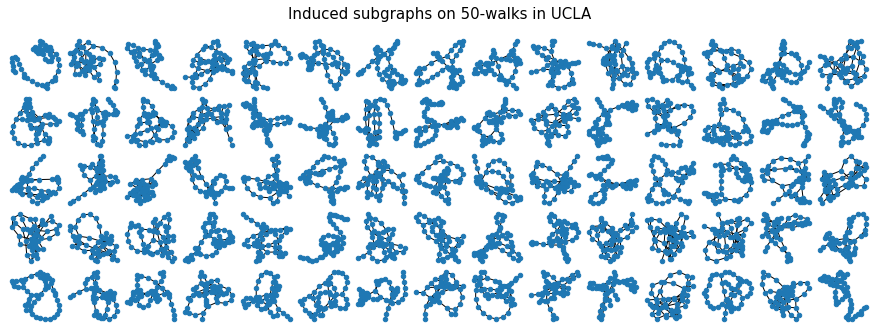

In [3]:
X, embs = G.get_patches(k=k, sample_size=2500, skip_folded_hom=True)

display_graphs(title='Induced subgraphs on {}-walks in {}'.format(k, ntwk_nonumber),
                 save_path=save_folder + ntwk_nonumber + "_subgraphs_"+ str(sampling_alg) + "_walk", 
                 data = [X, embs],
                 grid_shape = [5, 15],
                 fig_size = [15, 5],
                 show_importance=False)

In [4]:
graph_list = generate_nxg(X)
print(f"num of graphs: {len(graph_list)}")

num of graphs: 2500


In [5]:
nodes = int(np.sqrt(X.shape[0]))
df = pd.DataFrame()
K = 1

for G in graph_list:
        
    if nx.is_connected(G):

        adj_mat = nx.to_numpy_array(G)
        temp = pd.DataFrame(np.array(nx.adjacency_matrix(G).todense().flatten('C')))
        
        model = Kuramoto(coupling=K, dt=0.01, T=18, n_nodes=nodes, half_sync=False)

        sim = model.run(adj_mat)
        arr = sim.T[-1]
        conc = pd.DataFrame(pd.Series(synchronization(arr)), columns=['Synchronized'])
            
        temp = pd.concat([temp, conc], axis=1)

        df = pd.concat([df, temp], ignore_index=True)
    
df

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,Synchronized
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,False
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,False
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True
2496,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False
2497,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,False
2498,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False


In [6]:
print(f"% of synchronized cases: {sum(df['Synchronized'])/len(df)}")

% of synchronized cases: 0.2584


In [7]:
def adj_to_coladj(adj_mat, dynamics):
    col_adj = np.zeros((adj_mat.shape[0], adj_mat.shape[1]))
    for i in range(adj_mat.shape[0]):
        for j in range(i, adj_mat.shape[1]):
            if i == j or adj_mat[i][j] == 0:
                col_adj[i][j] = 0
                col_adj[j][i] = 0
            if adj_mat[i][j] == 1:
                a = abs(dynamics[j] - dynamics[i])
                b = abs(2*np.pi + (dynamics[j] - dynamics[i]))
                col_adj[i][j] = min(a, b)
                col_adj[j][i] = min(a, b)
                
    return col_adj

In [8]:
# model = Kuramoto(
#     coupling=10,
#     dt=0.05,
#     T=10000,
#     n_nodes=50,
#     base_iter=126,
#     half_sync=False
# )

In [9]:
# G = nx.newman_watts_strogatz_graph(50, 10, 0.35)
# adj = nx.to_numpy_array(G)
# sim = model.run(adj)

In [10]:
# model.concentrated

In [11]:
# sns.heatmap(adj);

In [12]:
# dynamics = sim.T[0]
# col_adj = adj_to_coladj(adj, dynamics)
# sns.heatmap(col_adj);

In [13]:
# dynamics = sim.T[125]
# col_adj = adj_to_coladj(adj, dynamics)
# sns.heatmap(col_adj);

In [14]:
# dynamics = sim.T[-1]
# col_adj = adj_to_coladj(adj, dynamics)
# sns.heatmap(col_adj);

In [15]:
# model = Kuramoto(
#     coupling=10,
#     dt=0.01,
#     T=18,
#     n_nodes=50,
#     base_iter=126,
#     half_sync=False
# )

In [16]:
# G = nx.grid_2d_graph(8, 8)
# adj = nx.to_numpy_array(G)

In [17]:
# model = Kuramoto(
#     coupling=10,
#     dt=0.01,
#     T=18,
#     n_nodes=64,
#     base_iter=126,
#     half_sync=False
# )

# sim = model.run(adj)

In [18]:
# sns.heatmap(sim.T[0].reshape(8, 8), cbar=False, xticklabels=False, yticklabels=False);

In [19]:
# sns.heatmap(sim.T[65].reshape(8, 8), cbar=False, xticklabels=False, yticklabels=False);

In [20]:
# sns.heatmap(sim.T[130].reshape(8, 8), cbar=False, xticklabels=False, yticklabels=False);

In [21]:
# sns.heatmap(sim.T[300].reshape(8, 8), cbar=False, xticklabels=False, yticklabels=False);

In [22]:
# model.baseline

In [23]:
# sim.T[-1].reshape(10, 8)

In [24]:
# sim.T[-1]

In [25]:
NWS = nx.newman_watts_strogatz_graph(20000, 1000, 0.67)
new_nodes = {e: n for n, e in enumerate(NWS.nodes, start=1)}
new_edges = [(new_nodes[e1], new_nodes[e2]) for e1, e2 in NWS.edges]
edgelist = []
for i in range(len(new_edges)):
    temp = [str(new_edges[i][0]), str(new_edges[i][1])]
    edgelist.append(temp)
G = nn.NNetwork()
G.add_edges(edgelist)

In [27]:
NWS.number_of_edges()

16704084

In [28]:
NWS.number_of_nodes()

20000

In [29]:
nx.density(NWS)

0.0835245962298115

In [30]:
nx.average_clustering(NWS)

0.3091395308962197